In [58]:
import cv2
import numpy as np
import os
from IPython.display import Image
import pandas as pd
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import urllib2
import cStringIO
import PIL.Image
from skimage import io

%matplotlib inline
pd.options.display.max_columns = 120
plt.rcParams["figure.figsize"] = [10,10]

In [44]:
url = "http://storage3.openstreetcam.org/files/photo/2017/5/21/proc/331670_3b530_5921e8b6da26d.jpg"

In [56]:
from skimage import io
img = io.imread(url)

In [48]:
file = cStringIO.StringIO(urllib.urlopen(url).read())
img = PIL.Image.open(file)

In [66]:
base = cv2.imread('data/331670/331670_3b530_5921e8b6da26d.jpg')

In [18]:
hsv = cv2.cvtColor(base, cv2.COLOR_BGR2HSV)

In [19]:
green = np.uint8([[[103,115,101 ]]])

hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)

print hsv_green

[[[ 64  31 115]]]


In [20]:
lower = np.array([10,31,31])
upper = np.array([115,255,255])

In [21]:
mask = cv2.inRange(hsv, lower, upper)

In [22]:
res = cv2.bitwise_and(base,base, mask= mask)

In [24]:
print sum(sum(hsv-res)[0]+sum(hsv-res)[1]+sum(hsv-res)[2])

347


In [68]:
base1 = cv2.imread('data/331670/331670_05f45_5921e8ef30eb8.jpg')

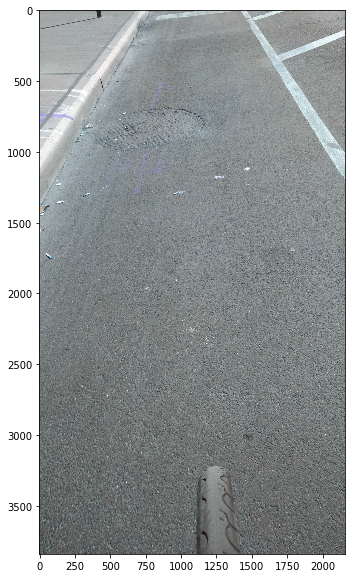

In [69]:
plt.imshow(base1)

In [12]:
hsv1 = cv2.cvtColor(base1, cv2.COLOR_BGR2HSV)

In [14]:
mask1 = cv2.inRange(hsv1, lower, upper)

In [15]:
res1 = cv2.bitwise_and(base1,base1, mask= mask1)

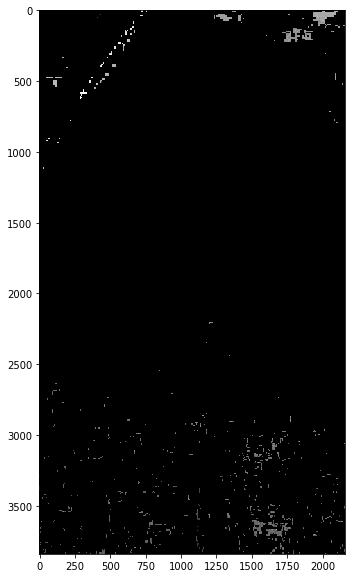

In [16]:
plt.imshow(res_white)

In [103]:
print sum(sum(hsv1-res1)[0]+sum(hsv1-res1)[1]+sum(hsv1-res1)[2])

138


In [17]:
test = cv2.imread('data/331670/331670_4a495_5921e8e90a39e.jpg')

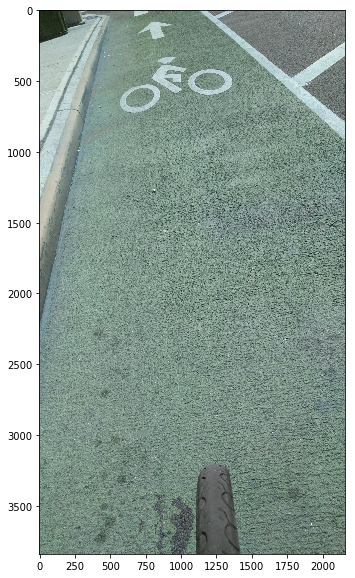

In [18]:
plt.imshow(test)

In [19]:
hsv2 = cv2.cvtColor(test, cv2.COLOR_BGR2HSV)

In [20]:
mask2 = cv2.inRange(hsv2, lower, upper)

In [21]:
res2 = cv2.bitwise_and(test,test, mask= mask2)

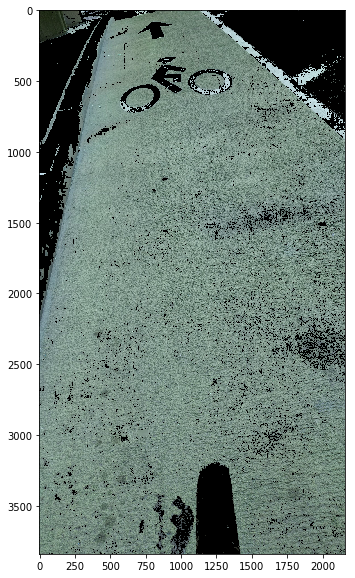

In [22]:
plt.imshow(res2)

In [23]:
print sum(sum(hsv2-res2)[0]+sum(hsv2-res2)[1]+sum(hsv2-res2)[2])

553


In [27]:
def score(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    res = cv2.bitwise_and(image,image, mask= mask)
    score = sum(sum(hsv-res)[0]+sum(hsv-res)[1]+sum(hsv-res)[2])
    print score

In [59]:
def colScore(url):
    image = io.imread(url)    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    res = cv2.bitwise_and(image,image, mask= mask)
    score = sum(sum(hsv-res)[0]+sum(hsv-res)[1]+sum(hsv-res)[2])
    print score

### Example

In [ ]:
#### LOAD DATA

In [70]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
src = os.path.join(parentdir,'src')
sys.path.insert(0,src) 
import loadOSCdata1
import pandas as pd
import numpy as np
import geopandas as gpd
#import matplotlib.pyplot as plt
#%matplotlib inline
import json

In [71]:
OSCid = 331670

In [72]:
data = loadOSCdata1.downloadData(OSCid=OSCid, X = True, Y = True, Z = True)
data.head()

,timestamp,point_id,v_value,geometry,image_url,image_lab,trip_id
292,2017-05-21 15:05:28.459,0.0,4.249603,POINT (-73.944566735 40.787503795),http://storage3.openstreetcam.org/files/photo/...,good,331670
383,2017-05-21 15:05:32.509,1.0,2.309574,POINT (-73.9446348 40.78738377),http://storage3.openstreetcam.org/files/photo/...,Error,331670
467,2017-05-21 15:05:36.152,2.0,7.113663,POINT (-73.94470771 40.78729057),http://storage3.openstreetcam.org/files/photo/...,Error,331670
555,2017-05-21 15:05:38.377,3.0,12.219062,POINT (-73.94479803 40.787168185),http://storage3.openstreetcam.org/files/photo/...,good,331670
620,2017-05-21 15:05:41.530,4.0,6.389072,POINT (-73.944851735 40.78708991),http://storage3.openstreetcam.org/files/photo/...,good,331670


In [73]:
url = data.image_url[292]

In [74]:
print url

http://storage3.openstreetcam.org/files/photo/2017/5/21/proc/331670_3b530_5921e8b6da26d.jpg


In [75]:
file = cStringIO.StringIO(urllib.urlopen(url).read())
img = PIL.Image.open(file)

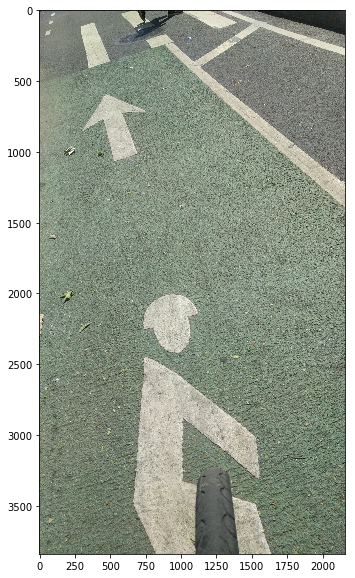

In [76]:
plt.imshow(img)

In [77]:
def colScore(url):
    image = io.imread(url)    
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower, upper)
    res = cv2.bitwise_and(image,image, mask= mask)
    score = sum(sum(hsv-res)[0]+sum(hsv-res)[1]+sum(hsv-res)[2])
    print score

In [78]:
colScore(url)

466
